In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

<class 'numpy.ndarray'> (618, 641, 3)


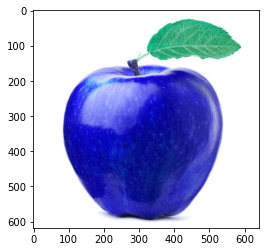

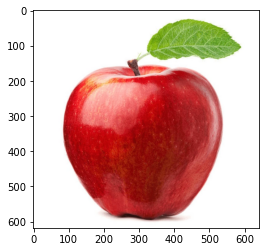

In [13]:
img = cv2.imread('Apple.webp')   # Read the image
print(type(img),img.shape)
plt.imshow(img)   # Ploting the image using matplotlib
plt.figure()
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [23]:
img_loc = 'Apple.webp'
img = cv2.imread(img_loc, cv2.IMREAD_UNCHANGED)

print(img.shape)

img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

print(img_grey.shape)

thresh = 200 # the lower the threshhold the more details we get
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

(618, 641, 3)
(618, 641)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


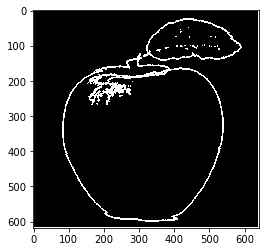

In [19]:
#create an empty image for contours
img_contours = np.zeros(img.shape)

# draw the contours on the empty image
cv2.drawContours(img_contours, contours, -1, (255,255,255), 3)

plt.imshow(img_contours, interpolation='none')

In [37]:
def read(path, switch_channels=True):
    """Read image pixel data from file
    Args:
    path (string): path to image on disk
    switch_channels (bool): if true changes the channels from bgr to rgb (used by matplotlib)"""
    image = cv2.imread(path)
    if switch_channels:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def resize(image, new_x_dim):
    """Reduces the amount of pixels
    Args:
    image (ndarray): the pixel cube
    nex_x_dim (int): new number of columns"""
    ratio = new_x_dim / image.shape[1]
    new_y_dim = int(image.shape[0] * ratio)
    dim = (new_x_dim, new_y_dim)
    resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized_image

def create_plot(image, title=''):
    plt.imshow(image, interpolation='none')
    plt.title(title)
    plt.axis('off')
    return plt


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

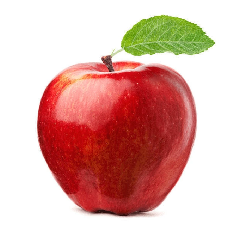

In [39]:
image_path = 'Apple.webp'

img = read(image_path)
create_plot(img)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

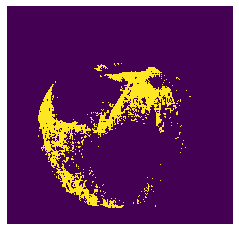

In [108]:
def create_ball_mask(image):
    """From an image create a HSV mask by identifying lower and upper bounds of the three values"""
    # Color values in HSV
    green_lower = (150,150,150) # hsv (0-360, 0-255, 0-255) sometimes written as (0-360, 100%, 100%)
    green_upper = (180,255,255)

    hsv_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
 
    mask = cv2.inRange(hsv_img, green_lower, green_upper) # inRange: exclude all pixels outside of range

    return mask
create_plot(create_ball_mask(img))

In [155]:
def mark_object(image, mask):
    """find the largest contour in the mask, then use it to compute the minimum enclosing circle and centroid"""
    # Finds contours in a binary image. The contours are a useful tool for shape analysis and object detection and recognition.
    contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]

    c = max(contours, key=cv2.contourArea)
    ((x, y), radius) = cv2.minEnclosingCircle(c)

    cv2.circle(image, center=(int(x), int(y)), radius=int(radius), color=(255, 0, 0), thickness=3)
    return image

In [106]:
mask = create_ball_mask(img)
img = mark_object(img, mask)
img_converted = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite(image_path, img_converted)

cv2.inRange(img,lower,higher)<class 'numpy.ndarray'> Image shape: (618, 641, 3) and mask shape: (618, 641)
 Image contains: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215


True

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

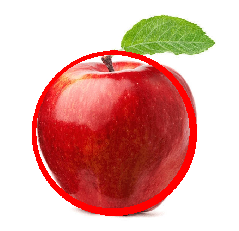

In [126]:
image_path = 'Apple.webp'

img = read(image_path)
create_plot(img)

In [112]:
dsa = "hej"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


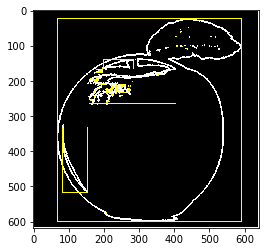

In [147]:
img_loc = 'Apple.webp'
img = cv2.imread(img_loc, cv2.IMREAD_UNCHANGED)
img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

thresh = 200 # the lower the threshhold the more details we get
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#create an empty image for contours
img_contours = np.zeros(img.shape)

# draw the contours on the empty image
cv2.drawContours(img_contours, contours, -1, (255,255,255), 3)

for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(img_contours, (x,y), (x+w,y+h), (255,255,0),1)

plt.imshow(img_contours, interpolation='none')

In [149]:
img = cv2.imread('apples.jpg')

# convert the image to HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


Image shape (562, 1000, 3) Thresh (562, 1000) [  0 254 255]


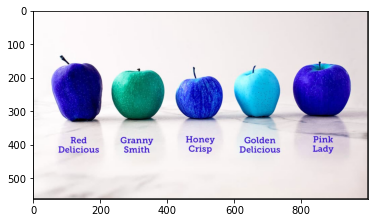

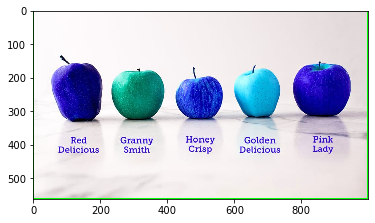

In [156]:
# convert the image to HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# find Otsu threshold on hue and saturation channel
ret, thresh_H = cv2.threshold(img_hsv[:,:,0], 200, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, thresh_S = cv2.threshold(img_hsv[:,:,1], 200, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# some morphology operation to clear unwanted spots
kernel = np.ones((5, 5), np.uint8)
thresh = thresh_H + thresh_S
print('Image shape',img_hsv.shape,'Thresh',thresh.shape,np.unique(thresh))
img_dilated = cv2.dilate(thresh, kernel, iterations = 1)

# find contours on the result above
(contours, hierarchy) = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
im1 = img.copy()
for c in contours:
    cv2.drawContours(im1, contours=[c], contourIdx=-1, color=(0,0,0),thickness=2)
plt.imshow(im1)
plt.figure()

# since there were few small contours found, retain only those above a certain area above 500 pixels
im2 = img.copy()
count = 0
for c in contours:
    if cv2.contourArea(c) > 500:
        count+=1
        cv2.drawContours(im2, [c], -1, (0, 255, 0), 2)

plt.imshow(im2, interpolation='none')

In [152]:
mask = cv2.erode(mask, None, iterations=2)
mask = cv2.dilate(mask, None, iterations=2)